<a href="https://colab.research.google.com/github/pcarbo/qBio9_stuff/blob/main/dataviz_qbio9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Data visualization tutorial: exploring data and telling stories using ggplot2</h1>

Peter Carbonetto<br>
University of Chicago<br>
Chicago, IL<br>

*Last modified on August 24, 2023*

In this lesson, we will learn how to use ggplot2 to create simpley
yet effective data visualizations. The ggplot2 package is an incredibly
powerful plotting interface that extends the base plotting functions in
R.

Some motivation
===============

A good figure is an important part of an impactful research paper or
presentation. A good figure is one that *tells an interesting story.*

Almost inevitably, creating a good figure takes iteration and
refinement. You will rarely get it right on the first try.

For these reasons, taking the *programmatic approach* to creating
plots is very powerful. It allows you to:

a. Create an endless variety of plots.

b. Reuse code to quickly create and revise plots.

In this tutorial we will explore the programmatic approach to plotting
using **ggplot2**.

Setup
=====

*Do I have what I need?* Download the tutorial materials from GitHub, and make sure you know where to find them.

If you have not already done so, install these packages:

In [57]:
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggrepel")
install.packages("htmlwidgets")
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



I run this every time in Jupyter notebook or Google Colab to make the code outputs look like they do in RStudio.

In [58]:
options(jupyter.rich_display = FALSE)

Do smaller dogs live longer?
============================

The study of dogs is a surprisingly fruitful area of research! In this
tutorial, we will make use of some data that was made available by the
authors of a 2008 *Genetics* article,
*Single-nucleotide-polymorphism-based association mapping of dog
stereotypes.* These data are stored in a CSV file.

Our main analysis aim is to investigate the anecdotal claim that
smaller breeds (such as Chihuahuas) live longer than larger breeds
(such as Saint Bernards).

Our first ggplot plot
---------------------

It will take us some time to understand *how* ggplot works, but let's
start by quickly creating our first ggplot.

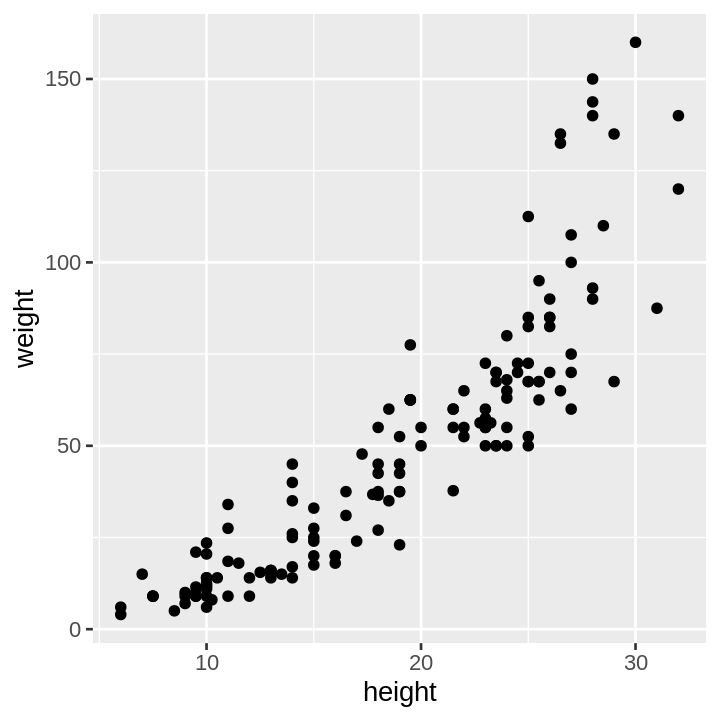

In [73]:
library(ggplot2)
options(repr.plot.width = 4,repr.plot.height = 4,repr.plot.res = 180)
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs.csv")
dogs <- read.csv("dogs.csv",stringsAsFactors = FALSE)
ggplot(dogs,aes(x = height,y = weight)) +
  geom_point()

A first look at the data
------------------------

When you load data into R for the first time, it is important to get a
basic understanding of the data frame and its contents.

[1] 148

[1] 6

[1] "breed"           "aod"             "height"          "weight"         
[5] "shortcoat"       "cfa7_46696633bp"

  breed                   aod  height weight shortcoat cfa7_46696633bp
1 Affenpinscher           13.0 10.25    8.0  0         0.375          
2 Afghan Hound            12.0 27.00   60.0  0         0.933          
3 Airedale Terrier        11.2 23.00   55.0  0         0.947          
4 Akita                   11.0 27.00  107.5  0         0.750          
5 Alaskan Malamute        12.0 24.00   80.0  0         0.914          
6 American Cocker Spaniel 12.5 15.00   27.5  0         0.279          

    breed                       aod  height weight shortcoat cfa7_46696633bp
143 Welsh Springer Spaniel      11.5 18     42.5   0         0.906          
144 Welsh Terrier               11.0 15     20.0   0         0.619          
145 West Highland White Terrier 12.8 11     18.5   0         0.521          
146 Whippet                     14.3 19     23.0   1         0.339          
147 Wirehaired Pointing Griffon 12.0 23     55.0   0         0.500          
148 Yorkshire Terrier           12.8  6      6.0   0         0.060          

    breed                aod            height          weight      
 Length:148         Min.   : 6.20   Min.   : 6.00   Min.   :  4.00  
 Class :character   1st Qu.:11.00   1st Qu.:13.00   1st Qu.: 17.88  
 Mode  :character   Median :12.50   Median :19.00   Median : 48.88  
                    Mean   :12.24   Mean   :18.77   Mean   : 49.23  
                    3rd Qu.:13.30   3rd Qu.:24.62   3rd Qu.: 67.50  
                    Max.   :17.00   Max.   :32.00   Max.   :160.00  
                                                                    
   shortcoat      cfa7_46696633bp 
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.3420  
 Median :0.0000   Median :0.7050  
 Mean   :0.3099   Mean   :0.6195  
 3rd Qu.:1.0000   3rd Qu.:0.9000  
 Max.   :1.0000   Max.   :1.0000  
 NA's   :6        NA's   :1       

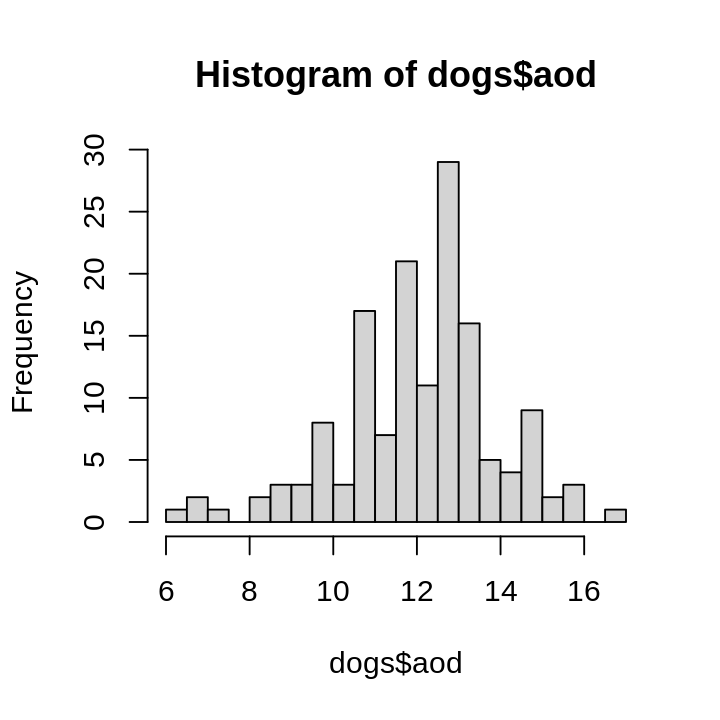

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.3099  1.0000  1.0000       6 

[1]  0 NA  1


   0    1 <NA> 
  98   44    6 

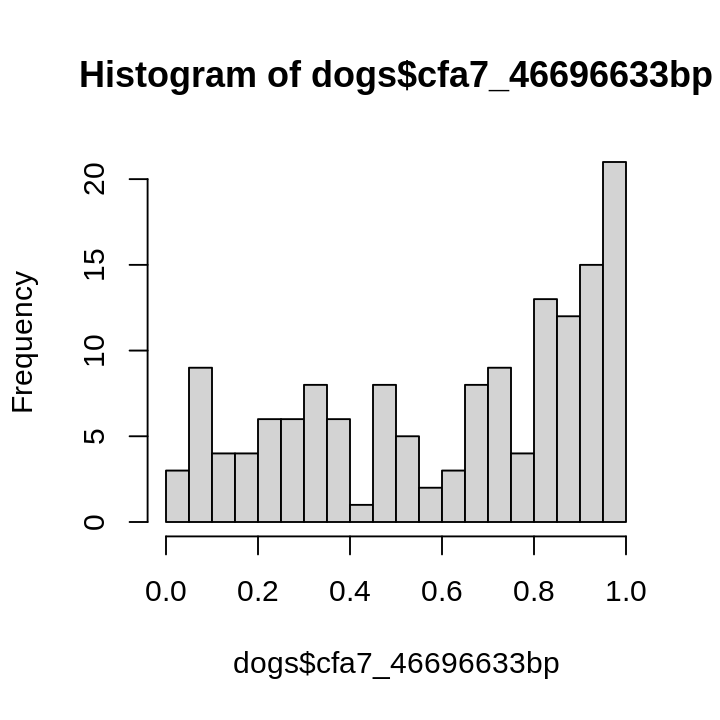

In [60]:
nrow(dogs)
ncol(dogs)
names(dogs)
head(dogs)
tail(dogs)
summary(dogs)
hist(dogs$aod,n = 32)
hist(dogs$cfa7_46696633bp,n = 32)
summary(dogs$shortcoat)
unique(dogs$shortcoat)
table(dogs$shortcoat,useNA = "always")

*What different types of data are in this table?*

The often overlooked scatterplot
--------------------------------

In this tutorial, we will learn about ggplot2 through one of the most
basic data visualizations: *the scatterplot.*

The scatterplot is easily overlooked because it is so simple. But it
can be one of the most effective ways to visualize relationships. And
it has many uses.

With embellishments (adding labels, varying color, shape, size,
*etc.*), scatterplots can produce stunning visualizations.

Our first ggplot2 (with "ugly" code)
------------------------------------

Recall, our objective is to investigate the relationship between
size and longevity in dogs. We'll use weight as a proxy for size.

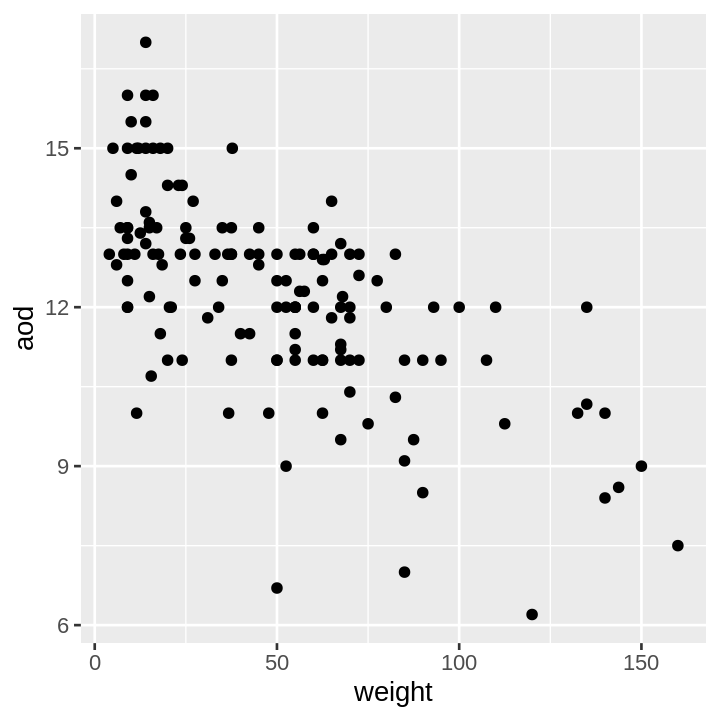

In [61]:
p <- ggplot(data = dogs,mapping = aes(x = weight,y = aod))
p <- ggplot_add(geom_point(),p)
p

Now for some more elegant code can accomplish the same thing. (This more
elegant code comes with a "for experts only" warning.)

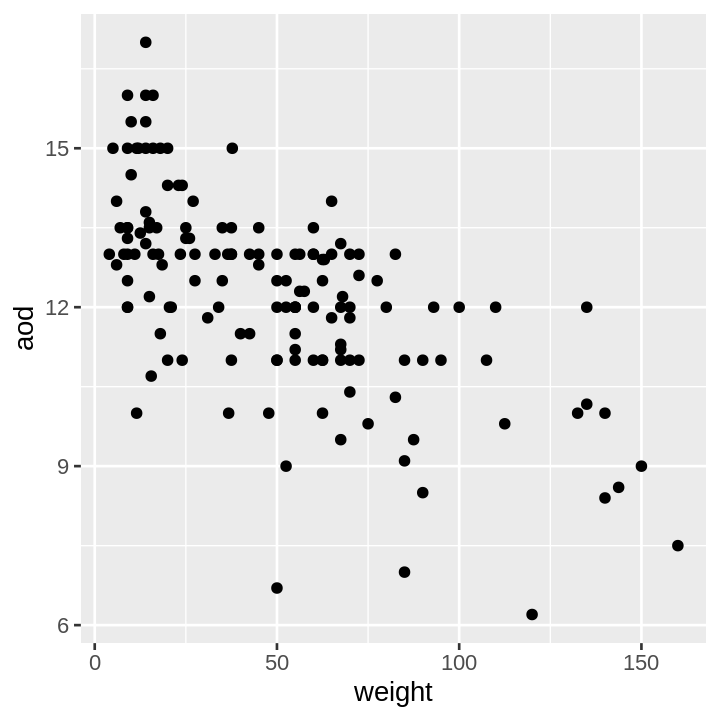

In [62]:
p <- ggplot(dogs,aes(x = weight,y = aod)) +
  geom_point()
p

For the moment I want to focus on the "uglier" code because it
highlights better the key elements of a ggplot2 plot:

1. The first input is the data (stored in a data frame).

2. The second input is an "aesthetic mapping", created using
   `aes` that defines how columns are mapped to features of the
   plot (axes, shapes, colors, *etc.*). *Note:* Many people use `aes`
   instead of `aes`.

3. A "geom", short for "geometric object", specifies the type of
   plot. ggplot2 has an excellent on-line reference at
   [ggplot2.tidyverse.org][ggplot2-reference] explaining all the
   "geoms", from bar charts to contour plots, with code examples for
   each.

4. ggplot2 outputs a *ggplot object* `p`, which can be drawn to the screen
   with `print(p)` or just `p` (then hit "enter" or "return").

The distinguishing feature of ggplot2 is that plots are created by
*adding layers*. This layering allows for infinite variety of plots to
be created. The layering approach means that ggplot2 is easily
extendible, and many R packages have been developed to enhance
ggplot2. (We will use two of these packages, ggrepel and cowplot.)

A few improvements
------------------

No plot is ever right the first time. *What are ways we can improve our
plot?* Add code for your improved plot here:

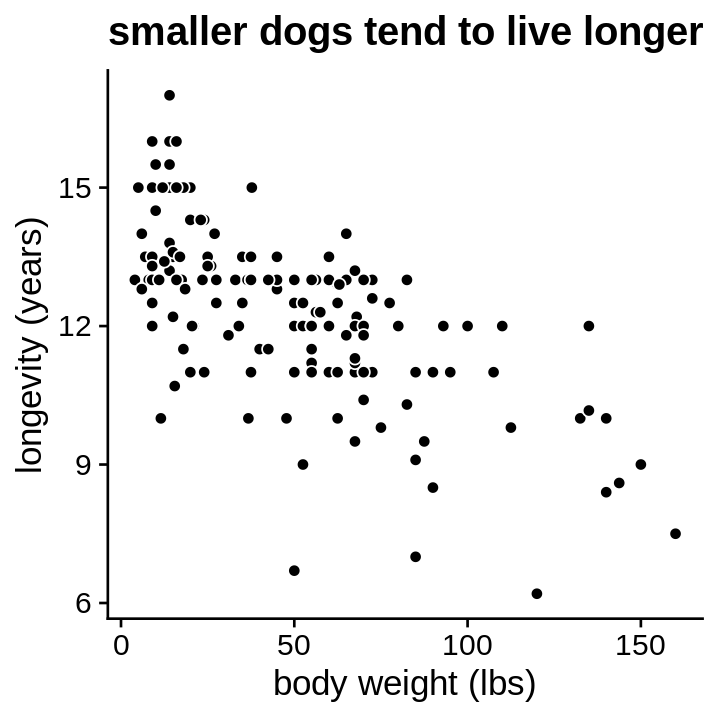

In [63]:
library(cowplot)
p <- ggplot(dogs,aes(x = weight,y = aod)) +
  geom_point(size = 2,shape = 21,color = "white",fill = "black") +
  labs(x = "body weight (lbs)",y = "longevity (years)",
       title = "smaller dogs tend to live longer") +
  theme_cowplot()
p

In ggplot, plots can be improved either by modifying the inputs to the
functions you are already using (for example, `geom_point` has many
settings that can be fiddled with), or by *adding layers*. The ggplot
online reference has many helpful examples that illustrate the variety
of ways plots can be improved.

Save your work
--------------

We've worked hard, and make considerable progress. This is a good
point to save our work in an image file that can be shared with
others. *What type of image file should we use?*

In [64]:
ggsave("dogs.pdf",p,height = 4,width = 4.5)
ggsave("dogs.png",p,height = 4,width = 4.5)

Plot the best-fit line
----------------------

It has been estimated that an increase of 28 lbs in a dog's body
weight corresponds to about a 1-year drop in expected lifespan (with a
maximum lifespan of about 13 years). How well does this estimate agree
with our data? Let's investigate this question by plotting the line
that *best fits* these data (specifically, this is the "least-squares"
fit).

In [65]:
fit <- lm(aod ~ weight,dogs)
coef(fit)

(Intercept)      weight 
13.96557423 -0.03497838 

Now let's add this "best fit" line to the plot. In case we make a
mistake, let's call our new plot "p2" to avoid writing over our
previous plot:

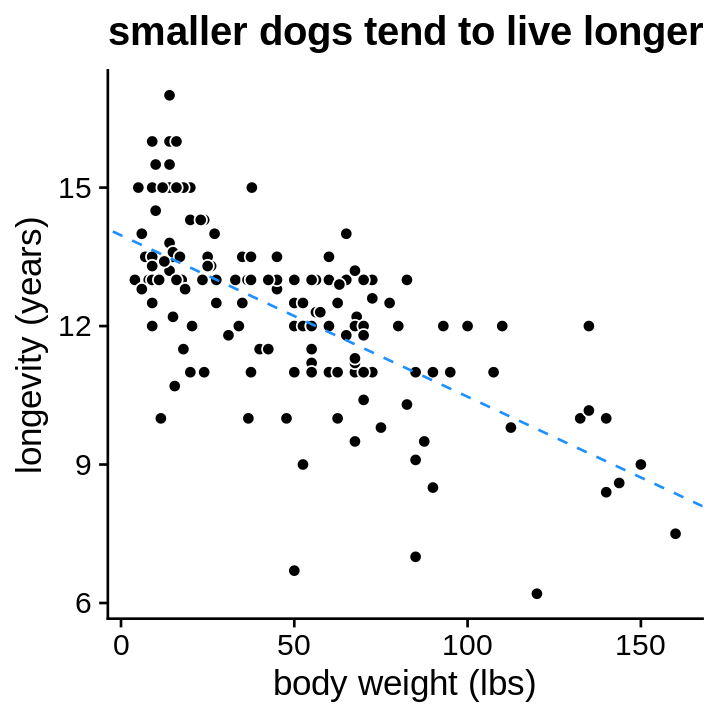

In [66]:
b <- coef(fit)
p2 <- p +
  geom_abline(color = "dodgerblue",linetype = "dashed",
              intercept = b[1],slope = b[2])
p2

Now let's add another another "abline" layer to compare our estimate
against the previous estimate (and name the new plot object "p3"):

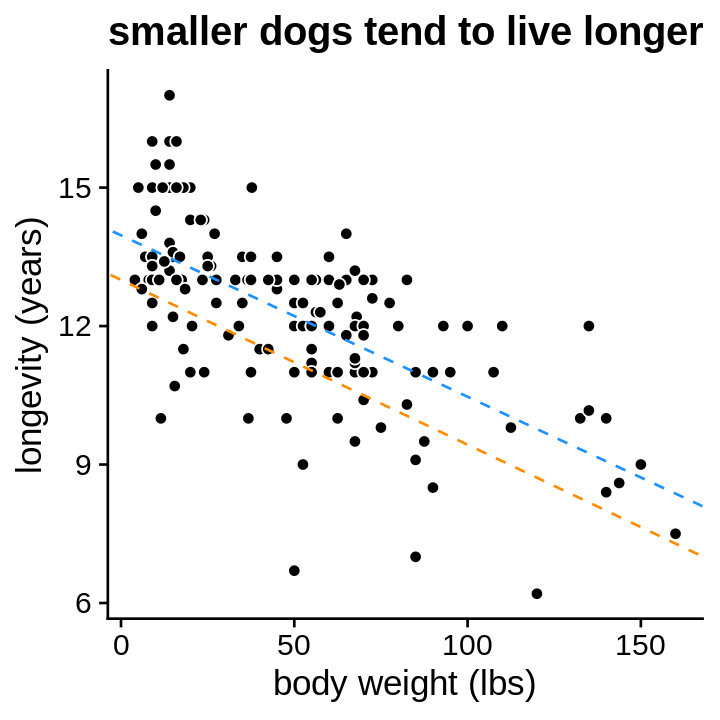

In [67]:
p3 <- p2 +
  geom_abline(color = "darkorange",linetype = "dashed",
              intercept = 13,slope = -1/28)
p3

Notice how easy it was to add layers to an existing plot!

Which breeds fit the trend, and which don't?
--------------------------------------------

It would be helpful if we could tell which breeds are being
plotted. Adding text labels to a ggplot is also done by adding a
layer.

There's one catch here—there simply isn't enough real estate on the
plot to accommodate all the breed names. This is a great opportunity
to play around with a clever package, **ggrepel**, that adds the
labels in a way that makes them more readable, and only adds them to
the plot when possible. Let's appreciate how simply this sophisticated
plot is created.

Warning message:
“ggrepel: 96 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


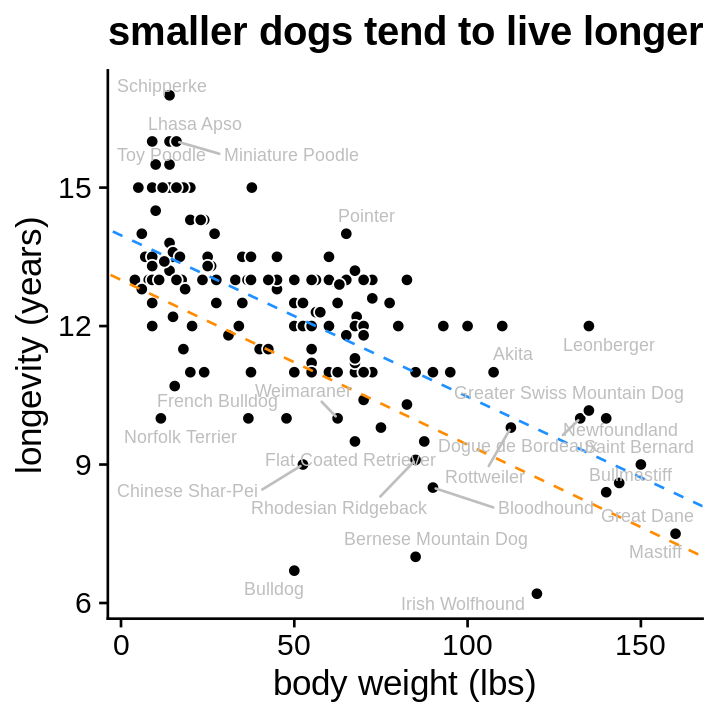

In [68]:
library(ggrepel)
p4 <- p3 + geom_text_repel(mapping = aes(label = breed),
                           size = 2.5,color = "gray")
p4

Notice that the labels are automatically redrawn as the plot is
resized. Give it a try!

A QTL for weight
----------------

In the *Genetics* paper, the strongest *quantitative trait locus*
(QTL) for weight was a QTL on chromosome 7. Using your ggplot coding
skills, create a scatterplot to visualize the relationship between
weight and the allele frequency at this QTL. *Is your code
reproducible? i.e., could I run your code to get the same plot?*


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 51 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


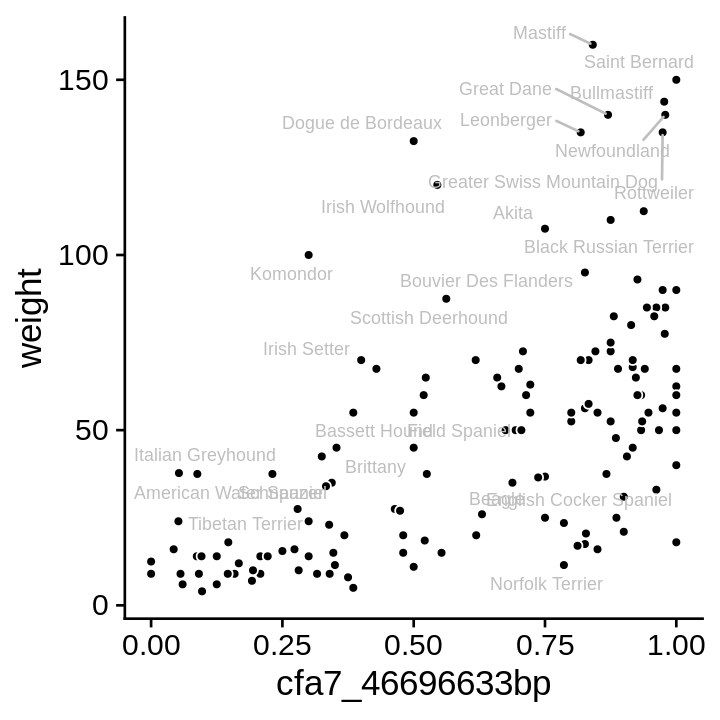

In [69]:
p <- ggplot(dogs,aes(x = cfa7_46696633bp,y = weight)) +
  geom_point(shape = 21,color = "white",fill = "black") +
  geom_text_repel(mapping = aes(label = breed),
                  size = 2.5,color = "gray") +
                  theme_cowplot()
p

Exploration: a surprising subtlety with color
=============================================

So far, we have focussed on using the co-ordinate plane to visualize
relationships. But other "aesthetics"—color, size, shape, *etc.*—can
also be used to tell an evocative story. In the last chapter of this
tutorial, we will explore the use of color to visualize relationships.
In so doing, we will discover a complication.

We learned that the "shortcoat" column had values of 0 or 1 (with a
few NAs).

Let's try varying the color of the points using the shortcoat column:

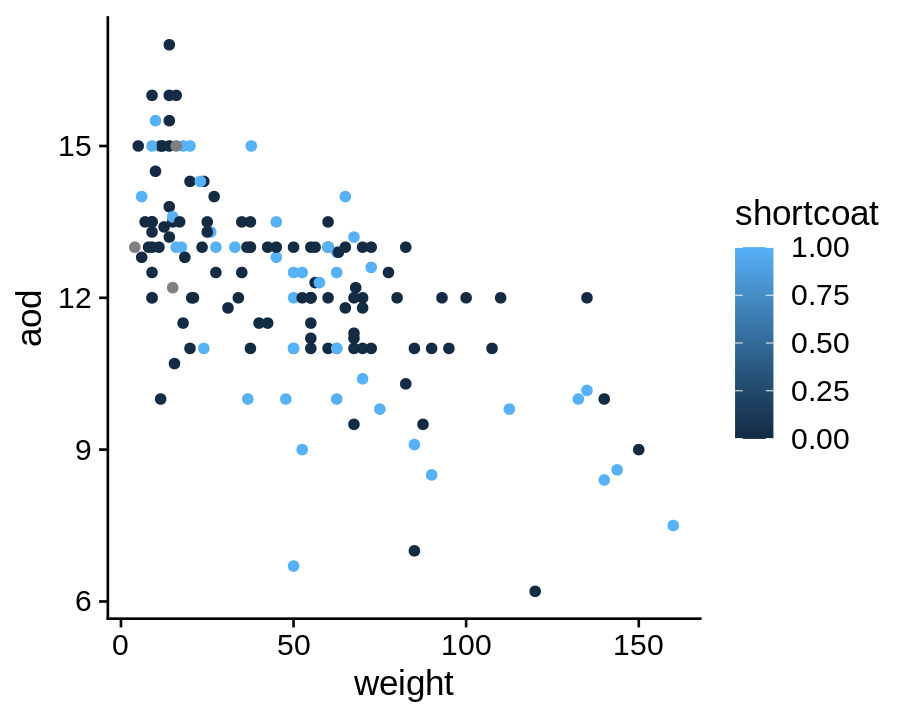

In [74]:
options(repr.plot.width = 5,repr.plot.height = 4,repr.plot.res = 180)
p <- ggplot(dogs,aes(x = weight,y = aod,color = shortcoat)) +
  geom_point() +
  theme_cowplot()
p

Are we happy with this plot? How could it be improved?* Write your
 code for an improved plot here:

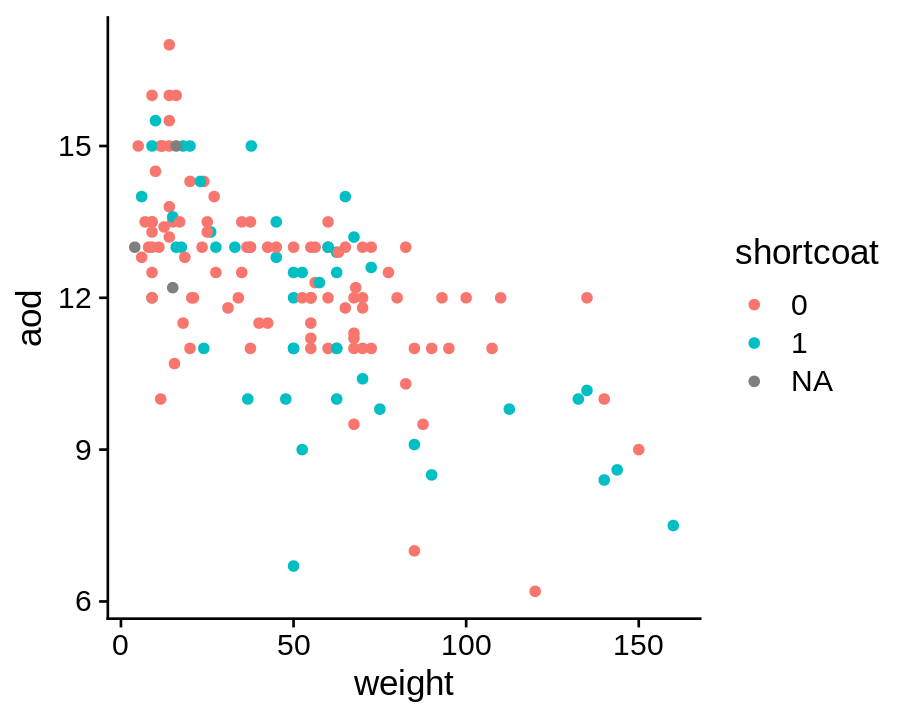

In [75]:
dogs$shortcoat <- factor(dogs$shortcoat)
p <- ggplot(dogs,aes(x = weight,y = aod,color = shortcoat)) +
  geom_point() +
  theme_cowplot()
p

*Optional:* Try varying the shape of the points instead of color. If
you have have written your ggplot code well, this should only involve
a slight change to your code. You can use `scale_shape_manual` to
select the shapes. Running `plot(0:23,pch = 0:23)` will give you the
full list of shapes to choose from.

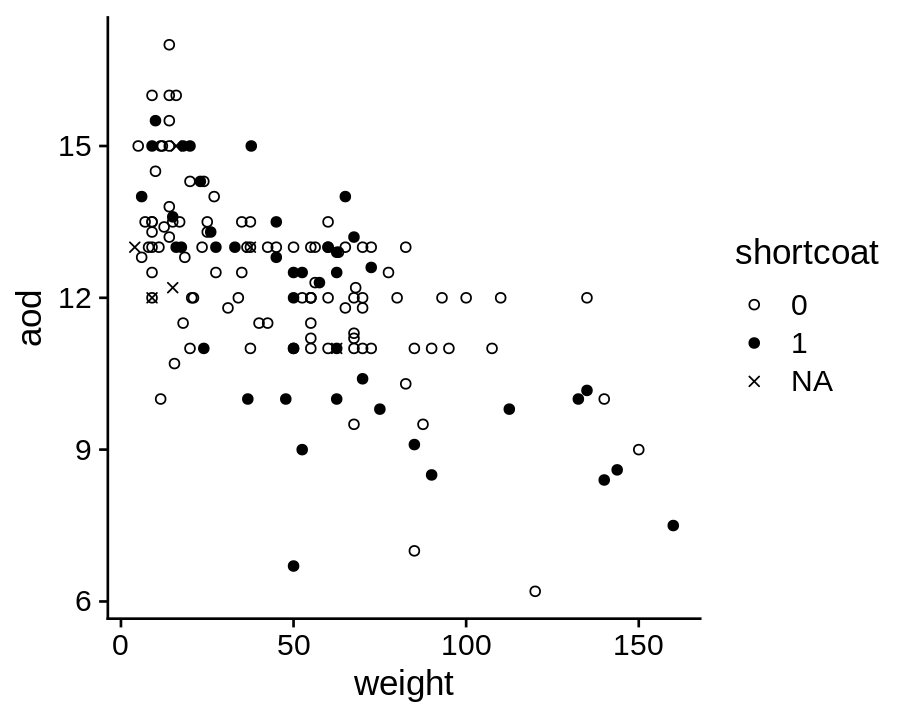

In [76]:
p <- ggplot(dogs,aes(x = weight,y = aod,shape = shortcoat)) +
  geom_point() +
  scale_shape_manual(values = c(1,19),na.value = 4) +
  theme_cowplot()
p

More on color
-------------

Carefully chosen colors can often be the difference between an
effective visualization and an ineffective one. One the few complaints
I have with ggplot2 is that the default colors choices are quite
poor. So when you use ggplot2, you will often need to make adjustments
to the colors. One rule-of-thumb is that "warmer" colors such as red
and orange tend to draw the reader's attention.

There are several good resources on use of color in data
visualization, and I will mention a couple here: Color Brewer
(https://colorbrewer2.org); and a short article, "Color blindness",
written by Bang Wong (*Nature Methods*, 2011). For more discussion,
see the "Fundamentals of data visualization" book by Claus Wilke.

In our scatterplot, the best color choice is less clear, so I will let
you experiment with different choices. To override the color
defaults, add a `scale_color_manual` layer:

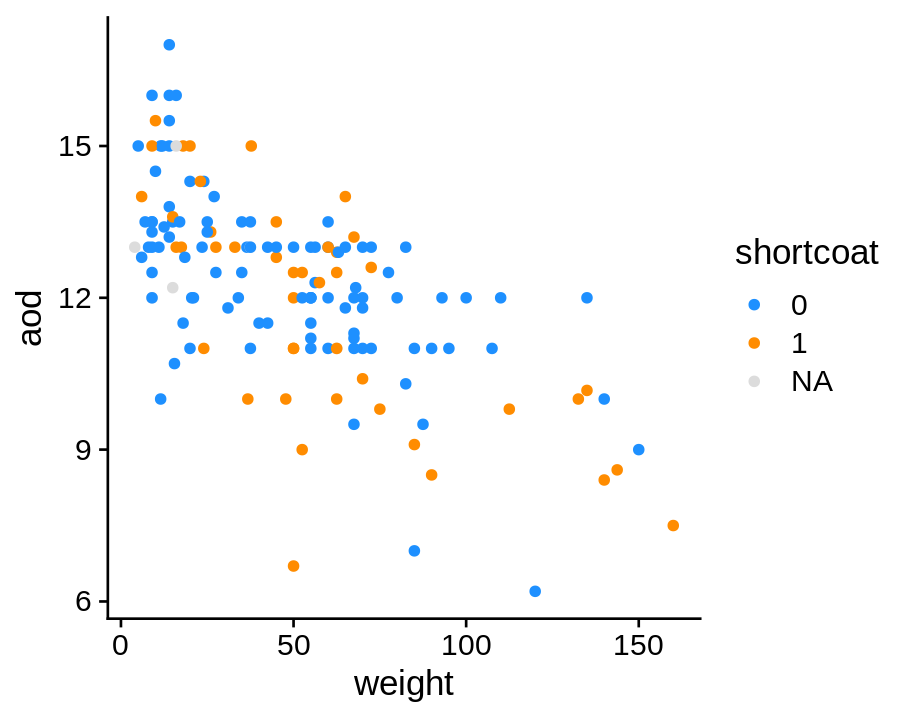

In [77]:
p <- ggplot(dogs,aes(x = weight,y = aod,color = shortcoat)) +
  geom_point() +
  scale_color_manual(values = c("dodgerblue","darkorange"),
                     na.value = "gainsboro") +
  theme_cowplot()
p

There are several different ways to specify colors. I prefer
specifying colors by name; to get the full list of color names, run
`colors()`.

The function that controls the color of a discrete variable has an odd
name: `scale_color_manual`. This is because, in ggplot2, all methods
that control the mapping of variables to colors, shapes, sizes, axes,
*etc.*, start with `scale_`.

Obviously, there is much more to ggplot2. But once you are comfortable
with these basic elements, you will find that almost everything else
in ggplot2 is a variation of what we covered in this lesson.